In [35]:
# 参数设置 
file_path = r'C:\Users\zhang\Desktop\md\2024corning\june\sphere_ti\14cry_300k_out.xyz'

In [36]:
import math
import matplotlib.pyplot as plt

def read_xyz_data(filename):
    """ 读取XYZ格式的文件数据 """
    atoms = []
    with open(filename, 'r') as file:
        next(file)  # 跳过第一行（原子总数）
        next(file)  # 跳过第二行（注释行）
        for line in file:
            parts = line.split()
            if len(parts) == 4:  # 确保每行数据正确
                atom_type, x, y, z = parts
                atoms.append((atom_type, float(x), float(y), float(z)))
    return atoms

def calculate_density_by_type(atoms, center, bin_size, max_radius):
    """ 根据中心点和原子类型计算每个球壳内的原子数密度分布 """
    # 初始化类型字典
    types = {}
    for atom in atoms:
        atom_type = atom[0]
        if atom_type not in types:
            types[atom_type] = []

        # 计算距离并分类
        x, y, z = atom[1], atom[2], atom[3]
        distance = math.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)
        types[atom_type].append(distance)
    
    # 初始化结果字典
    density_results = {}
    for atom_type, distances in types.items():
        # 初始化bin计数
        max_bin = int(max_radius / bin_size)
        bin_counts = [0] * (max_bin + 1)
        
        # 统计每个bin中的原子数
        for distance in distances:
            if distance <= max_radius:
                bin_index = int(distance / bin_size)
                bin_counts[bin_index] += 1

        # 计算每个bin的体积和密度
        densities = []
        for i in range(max_bin):
            outer_radius = (i + 1) * bin_size
            inner_radius = i * bin_size
            shell_volume = 4/3 * math.pi * (outer_radius**3 - inner_radius**3)
            density = bin_counts[i] / shell_volume if shell_volume else 0
            densities.append((i * bin_size + bin_size/2, density))
        density_results[atom_type] = densities

    return density_results



In [37]:
# 示例数据文件路径
filename = file_path
# 读取原子数据
atoms = read_xyz_data(filename)

# 首先得得出最大的盒子尺寸吧  大致看一下结果
max_x, max_y, max_z = 0, 0, 0
min_x, min_y, min_z = 1, 1, 1
# 再统计一下Ti原子的平均中心位置
count_ti = 0
sum_x, sum_y, sum_z = 0,0,0
for i_atom in atoms:
    temp_x,temp_y, temp_z = i_atom[1],i_atom[2],i_atom[3]
    max_x,max_y,max_z = max(max_x,temp_x),max(max_y,temp_y),max(max_z,temp_z)
    min_x, min_y, min_z = min(min_x, temp_x),min(min_y, temp_y),min(min_z, temp_z)
    if i_atom[0]=='Ti':
        sum_x+=temp_x
        sum_y+=temp_y
        sum_z+=temp_z
        count_ti+=1

# 输出结果
print(f'max: {round(max_x,2)} {round(max_y,2)} {round(max_z,2)}')
print(f'min: {round(min_x,2)} {round(min_y,2)} {round(min_z,2)}')
print('')
print(f'mean_Ti: {round(sum_x/count_ti,2)} {round(sum_y/count_ti,2)} {round(sum_z/count_ti,2)}')

max: 64.13 64.13 64.13
min: 0.0 0.0 0.0

mean_Ti: 32.43 31.89 32.06


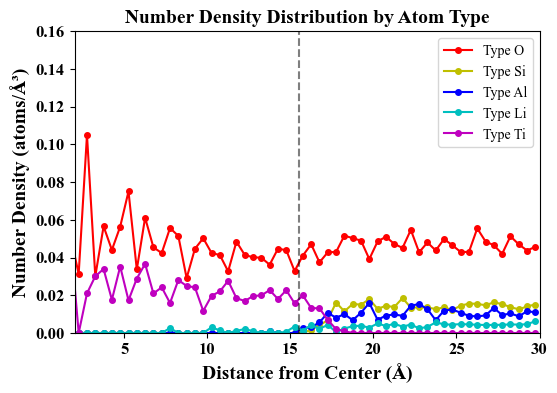

In [38]:
# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# 创建一个图形并设置清晰度
plt.figure(dpi=100) # ,figsize=(8, 6)
# 示例数据文件路径
filename = file_path

# 读取原子数据
atoms = read_xyz_data(filename)

# 定义中心点
center = (32.0, 32.0, 32.0)  # 例如可以更改为你的特定中心点

# 计算密度分布
bin_size = 0.5  # 每个bin的大小
max_radius = 30.0  # 最大半径范围

density_results = calculate_density_by_type(atoms, center, bin_size, max_radius)

# 绘图
#plt.figure(figsize=(10, 6))
# O SI AL Li Ti

# 设置X轴和Y轴的刻度值的字体为黑体和字体大小
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
colors = ['r', 'y', 'b', 'c', 'm',  'k']  # 颜色列表
for i, (atom_type, densities) in enumerate(density_results.items()):
    radii, density_values = zip(*densities)
    plt.plot(radii, density_values, marker='o',markersize='4',linestyle='-', color=colors[i % len(colors)], label=f'Type {atom_type}')

plt.title('Number Density Distribution by Atom Type', fontsize=14, fontweight='bold')
plt.xlabel('Distance from Center (Å)', fontsize=14, fontweight='bold')
plt.ylabel('Number Density (atoms/Å³)', fontsize=14, fontweight='bold')
plt.axvline(x=15.5, color='black', linestyle='--', alpha=0.5)
plt.xlim(2,30)
plt.ylim(0,0.16)
# plt.grid(True)
plt.legend()
plt.show()